In [140]:
import tensorflow as tf
import pandas as pd
from sklearn import *
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
tf.__version__

'1.4.0'

In [119]:
df = pd.read_csv("/data/Combined_Cycle_Power_Plant.csv")
df.head()
y = df.PE.values.reshape(-1, 1)
X = df.iloc[:, :-1].values.astype(np.float32)
X = preprocessing.StandardScaler().fit_transform(X)
print(X.shape, y.shape)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state = 134)

(47840, 4) (47840, 1)


In [120]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print("MSE: ", metrics.mean_squared_error(y_test, lr.predict(X_test)))
lr.intercept_, lr.coef_

MSE:  20.8099125274


(array([ 454.35983276], dtype=float32),
 array([[-14.69581604,  -3.0020566 ,   0.38572252,  -2.29661846]], dtype=float32))

In [137]:
tf.reset_default_graph()
n_x, n_y = 4, 1 # number of features of df is 4, and output is single value 
max_iter = 10000

X = tf.placeholder(dtype=tf.float32, shape=[None, n_x], name = "X")
y = tf.placeholder(dtype=tf.float32, shape=[None, n_y], name = "y")

print("X:", X)
print("y:", y)

W = tf.Variable(initial_value = tf.zeros([n_x, n_y], dtype=tf.float32), name="W")
#W = tf.Variable(tf.truncated_normal([n_x, n_y], stddev=0.1, seed = 1, dtype=tf.float32), name = "W")

print("W:", W)

b = tf.Variable(0.0, dtype=tf.float32, name="b")

Z = tf.matmul(X, W) + b
print("Z: ", Z)

#y_pred = tf.nn.relu(Z)
y_pred = Z


residual = (y_pred - y)
print("residual", residual)

mse = tf.reduce_mean(tf.square(residual))
print("MSE", mse)

cost = mse

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(max_iter):
        cost_, _ = sess.run([cost, optimizer], feed_dict={X: X_train, y: y_train})
        if i % (max_iter//10) ==0:
            print(cost_)
    
    mse_, y_test_pred = sess.run([mse, y_pred], feed_dict={X: X_test, y: y_test})
    print("Test MSE", mse_)

X: Tensor("X:0", shape=(?, 4), dtype=float32)
y: Tensor("y:0", shape=(?, 1), dtype=float32)
W: <tf.Variable 'W:0' shape=(4, 1) dtype=float32_ref>
Z:  Tensor("add:0", shape=(?, 1), dtype=float32)
residual Tensor("sub:0", shape=(?, 1), dtype=float32)
MSE Tensor("Mean:0", shape=(), dtype=float32)
206649.0
20.7549
20.7549
20.7549
20.7549
20.7549
20.7549
20.7549
20.7549
20.7549
Test MSE 20.8099


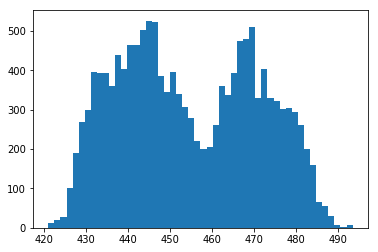

In [143]:
plt.hist(y_test_pred, bins = 50);

In [161]:
df = pd.read_csv("/data/kaggle/house-prices/data_combined_cleaned.csv")
if "Id" in df.columns: 
    del df["Id"]
target = "SalesPrice"
df_dummy = pd.get_dummies(df, drop_first=True)

del df_dummy[target]
X = preprocessing.StandardScaler().fit_transform(df_dummy)
y = df[target]

X = X[~np.isnan(y)]
y = y[~np.isnan(y)]
y = np.log(y).reshape(-1, 1)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                    test_size = 0.3, random_state = 1)

est = linear_model.Lasso(random_state=1, alpha=0.01, max_iter=10000)
est.fit(X_train, y_train)
print("train mse: ", metrics.mean_squared_error(y_train, est.predict(X_train)), 
      "test mse:", metrics.mean_squared_error(y_test, est.predict(X_test)))

train mse:  0.0153533326614 test mse: 0.0227024586741


/Users/abulbasar/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  del sys.path[0]


In [166]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1022, 259), (438, 259), (1022, 1), (438, 1))

In [171]:
tf.reset_default_graph()
n_x, n_y = X_train.shape[1], 1 # number of features of df is 4, and output is single value 
max_iter = 10000
alpha = 100

X = tf.placeholder(dtype=tf.float32, shape=[None, n_x], name = "X")
y = tf.placeholder(dtype=tf.float32, shape=[None, n_y], name = "y")

print("X:", X)
print("y:", y)

#W = tf.Variable(initial_value = tf.zeros([n_x, n_y], dtype=tf.float32), name="W")
W = tf.Variable(tf.truncated_normal([n_x, n_y], stddev=0.1, seed = 1, dtype=tf.float32), name = "W")

print("W:", W)

b = tf.Variable(0.0, dtype=tf.float32, name="b")

Z = tf.matmul(X, W) + b
print("Z: ", Z)

#y_pred = tf.nn.relu(Z)
y_pred = Z


residual = (y_pred - y)
print("residual", residual)

mse = tf.reduce_mean(tf.square(residual))
print("MSE", mse)

regularization = tf.nn.l2_loss(W) / tf.cast(tf.shape(X)[0], tf.float32)

cost = mse + alpha * regularization

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(max_iter):
        cost_, _ = sess.run([cost, optimizer], feed_dict={X: X_train, y: y_train})
        if i % (max_iter//10) ==0:
            print(cost_)
    
    mse_, y_test_pred = sess.run([mse, y_pred], feed_dict={X: X_test, y: y_test})
    print("Test MSE", mse_)

X: Tensor("X:0", shape=(?, 259), dtype=float32)
y: Tensor("y:0", shape=(?, 1), dtype=float32)
W: <tf.Variable 'W:0' shape=(259, 1) dtype=float32_ref>
Z:  Tensor("add:0", shape=(?, 1), dtype=float32)
residual Tensor("sub:0", shape=(?, 1), dtype=float32)
MSE Tensor("Mean:0", shape=(), dtype=float32)
146.995
0.0190361
0.0118041
0.0109312
0.0108118
0.0107951
0.0107927
0.0107924
0.0107924
0.0107923
Test MSE 0.0232509


In [175]:
df = pd.read_csv("/data/credit-default.csv")
y = np.where(df.default == 2, 1, 0).reshape(-1, 1)
X = df.copy()
target = "default"
del X[target]
X = pd.get_dummies(X, drop_first=True)
columns = X.columns
X = preprocessing.StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, 
                                    test_size = 0.3, random_state = 1)

lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

/Users/abulbasar/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75666666666666671

In [176]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 48), (300, 48), (700, 1), (300, 1))

X: Tensor("X:0", shape=(?, 48), dtype=float32)
y: Tensor("y:0", shape=(?, 1), dtype=float32)
W: <tf.Variable 'W:0' shape=(48, 1) dtype=float32_ref>
Z:  Tensor("add:0", shape=(?, 1), dtype=float32)
0 0.764089
25 0.525097
50 0.480178
75 0.459155
100 0.447479
125 0.440619
150 0.436585
175 0.434221
200 0.432845
225 0.432051
Test log loss:  0.526942
Test accuracy: 0.76


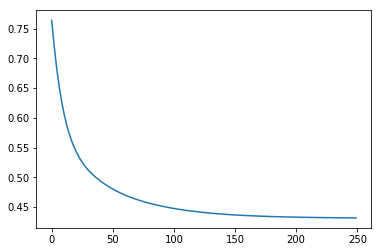

In [198]:
tf.reset_default_graph()
n_x, n_y = X_train.shape[1], 1 # number of features of df is 4, and output is single value 
max_iter = 250
alpha = 100

X = tf.placeholder(dtype=tf.float32, shape=[None, n_x], name = "X")
y = tf.placeholder(dtype=tf.float32, shape=[None, n_y], name = "y")

print("X:", X)
print("y:", y)

#W = tf.Variable(initial_value = tf.zeros([n_x, n_y], dtype=tf.float32), name="W")
W = tf.Variable(tf.truncated_normal([n_x, n_y], stddev=0.1, seed = 1, dtype=tf.float32), name = "W")

print("W:", W)

b = tf.Variable(0.0, dtype=tf.float32, name="b")

Z = tf.matmul(X, W) + b
print("Z: ", Z)

y_prob = tf.nn.sigmoid(Z)


cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=Z))

optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    scores = {}
    for i in range(max_iter):
        cost_, _ = sess.run([cost, optimizer], feed_dict={X: X_train, y: y_train})
        scores[i] = cost_
        if i % (max_iter//10) ==0:
            print(i, cost_)
    
    cost_, y_test_prob = sess.run([cost, y_prob], feed_dict={X: X_test, y: y_test})
    print("Test log loss: ", cost_)
    
y_test_pred = np.where(y_test_prob > 0.5, 1, 0)
print("Test accuracy:", metrics.accuracy_score(y_test_pred, y_test))

pd.Series(scores).plot()